In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec            # to arrange the plots nicely
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.stats import chisquare

%matplotlib inline
#plt.style.use('seaborn-talk')
#plt.style.use('seaborn-white')
#plt.style.use('tableau-colorblind10')
#plt.style.use('ggplot')
#plt.style.available

In [22]:
# bandwidth(t)

ib=pd.read_csv("../write_p/band_1B.txt",sep=';',names=['null','null','null','null','ib','null','null','null','null','null','null','null','null','null','null','null'])
vb=pd.read_csv("../write_p/band_8B.txt",sep=';',names=['null','null','null','null','vb','null','null','null','null','null','null','null','null','null','null','null'])
cb=pd.read_csv("../write_p/band_128B.txt",sep=';',names=['null','null','null','null','cb','null','null','null','null','null','null','null','null','null','null','null'])
db=pd.read_csv("../write_p/band_512B.txt",sep=';',names=['null','null','null','null','db','null','null','null','null','null','null','null','null','null','null','null'])
ikb=pd.read_csv("../write_p/band_1KB.txt",sep=';',names=['null','null','null','null','ikb','null','null','null','null','null','null','null','null','null','null','null'])
vkb=pd.read_csv("../write_p/band_8KB.txt",sep=';',names=['null','null','null','null','vkb','null','null','null','null','null','null','null','null','null','null','null'])
ckb=pd.read_csv("../write_p/band_128KB.txt",sep=';',names=['null','null','null','null','ckb','null','null','null','null','null','null','null','null','null','null','null'])
dkb=pd.read_csv("../write_p/band_512KB.txt",sep=';',names=['null','null','null','null','dkb','null','null','null','null','null','null','null','null','null','null','null'])
imb=pd.read_csv("../write_p/band_1MB.txt",sep=';',names=['null','null','null','null','imb','null','null','null','null','null','null','null','null','null','null','null'])
vmb=pd.read_csv("../write_p/band_8MB.txt",sep=';',names=['null','null','null','null','vmb','null','null','null','null','null','null','null','null','null','null','null'])
cmb=pd.read_csv("../write_p/band_128MB.txt",sep=';',names=['null','null','null','null','cmb','null','null','null','null','null','null','null','null','null','null','null'])
dmb=pd.read_csv("../write_p/band_512MB.txt",sep=';',names=['null','null','null','null','dmb','null','null','null','null','null','null','null','null','null','null','null'])
#igb=pd.read_csv("../write_p/band_1GB.txt",sep=';',names=['null','null','null','null','igb','null','null','null','null','null','null','null','null','null','null','null'])

ib=ib['ib']
vb=vb['vb']
cb=cb['cb']
db=db['db']
ikb=ikb['ikb']
vkb=vkb['vkb']
ckb=ckb['ckb']
dkb=dkb['dkb']
imb=imb['imb']
vmb=vmb['vmb']
cmb=cmb['cmb']
dmb=dmb['dmb']
#igb=igb['igb']

band=pd.concat([ib,vb,cb,db,ikb,vkb,ckb,dkb,imb,vmb,cmb,dmb], axis=1, sort=False)

band['ib']=band['ib']*8/1000000000
band['vb']=band['vb']*8/1000000000
band['cb']=band['cb']*8/1000000000
band['db']=band['db']*8/1000000000
band['ikb']=band['ikb']*8/1000000000
band['vkb']=band['vkb']*8/1000000000
band['ckb']=band['ckb']*8/1000000000
band['dkb']=band['dkb']*8/1000000000
band['imb']=band['imb']*8/1000000000
band['vmb']=band['vmb']*8/1000000000
band['cmb']=band['cmb']*8/1000000000
band['dmb']=band['dmb']*8/1000000000
#band['igb']=band['igb']*8/1000000000

band=band.rename(columns={'ib' : '1 B',
                         'vb' : '8 B',
                         'cb' : '128 B',
                         'db' : '512 B',
                         'ikb' : '1 KB',
                         'vkb' : '8 KB',
                         'ckb' : '128 KB',
                         'dkb' : '512 KB',
                         'imb' : '1 MB',
                         'vmb' : '8 MB',
                         'cmb' : '128 MB',
                         'dmb' : '512 MB',})

band=band.iloc[::2]
band.index = range(20)

means=pd.DataFrame({"Average Bandwidth":[band['1 B'].mean(),band['8 B'].mean(),band['128 B'].mean(),band['512 B'].mean(),
                                        band['1 KB'].mean(),band['8 KB'].mean(),band['128 KB'].mean(),band['512 KB'].mean(),
                                        band['1 MB'].mean(),band['8 MB'].mean(),band['128 MB'].mean(),band['512 MB'].mean()],
                   "Range":['1 B','8 B','128 B','512 B','1 KB','8 KB','128 KB','512 KB','1 MB','8 MB','128 MB','512 MB']})

#band.head(20)
means.head(13)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


Average Bandwidth   Range
0            0.087134     1 B
1            0.686561     8 B
2            8.121565   128 B
3            8.145856   512 B
4           22.449766    1 KB
5           22.497012    8 KB
6           52.686101  128 KB
7           53.226242  512 KB
8           50.102316    1 MB
9           52.303371    8 MB
10          51.407379  128 MB
11          51.432715  512 MB

In [24]:
band.plot(y=['1 B','8 B','128 B','512 B','1 KB','8 KB','128 KB','512 KB','1 MB','8 MB','128 MB','512 MB'])
plt.ylabel("Bandwidth (Gb/s)")
plt.xlabel("Time (s)")
#plt.ylim(-50,200)
plt.xlim(0,19)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.suptitle('Bandwidth', fontsize=14, fontweight='bold')
plt.tight_layout() # otherwise it's cut
plt.savefig('/Users/massimilianogalli/Documents/openlab2018/LaTeX_template_openlab_approved/figures/band_sto_time_w.eps',format='eps',dpi=1000)
plt.show()

In [26]:
means.plot(y=['Average Bandwidth'],xticks=means.index,marker='d').set_xticklabels(means.Range)
#ax.set_xticklabels(means.action)
plt.ylabel("Average Bandwidth (Gb/s)")
plt.xlabel("Buffer Size")
#plt.ylim(0,100)
plt.legend(bbox_to_anchor=(0.5, 0.2), loc=2, borderaxespad=0.)
#plt.suptitle('Average Bandwidth (Buffer Size)', fontsize=14, fontweight='bold')
plt.xticks(rotation=40)
plt.tight_layout() # otherwise it's cut
plt.savefig('/Users/massimilianogalli/Documents/openlab2018/LaTeX_template_openlab_approved/figures/band_sto_buf_w.eps',format='eps',dpi=1000)
plt.show()

In [29]:
# disk

ib=pd.read_csv("../write_p/disk_1B.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','ib','null','null','null','null','null','null','null'])
vb=pd.read_csv("../write_p/disk_8B.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','vb','null','null','null','null','null','null','null'])
cb=pd.read_csv("../write_p/disk_128B.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','cb','null','null','null','null','null','null','null'])
db=pd.read_csv("../write_p/disk_512B.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','db','null','null','null','null','null','null','null'])
ikb=pd.read_csv("../write_p/disk_1KB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','ikb','null','null','null','null','null','null','null'])
vkb=pd.read_csv("../write_p/disk_8KB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','vkb','null','null','null','null','null','null','null'])
ckb=pd.read_csv("../write_p/disk_128KB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','ckb','null','null','null','null','null','null','null'])
dkb=pd.read_csv("../write_p/disk_512KB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','dkb','null','null','null','null','null','null','null'])
imb=pd.read_csv("../write_p/disk_1MB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','imb','null','null','null','null','null','null','null'])
vmb=pd.read_csv("../write_p/disk_8MB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','vmb','null','null','null','null','null','null','null'])
cmb=pd.read_csv("../write_p/disk_128MB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','cmb','null','null','null','null','null','null','null'])
dmb=pd.read_csv("../write_p/disk_512MB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','dmb','null','null','null','null','null','null','null'])
#igb=pd.read_csv("../write_p/disk_1GB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','null','igb','null','null','null','null','null','null','null'])

ib=ib['ib']
vb=vb['vb']
cb=cb['cb']
db=db['db']
ikb=ikb['ikb']
vkb=vkb['vkb']
ckb=ckb['ckb']
dkb=dkb['dkb']
imb=imb['imb']
vmb=vmb['vmb']
cmb=cmb['cmb']
dmb=dmb['dmb']
#igb=igb['igb']

disk=pd.concat([ib,vb,cb,db,ikb,vkb,ckb,dkb,imb,vmb,cmb,dmb], axis=1, sort=False)

disk['ib']=disk['ib']*8/1000000
disk['vb']=disk['vb']*8/1000000
disk['cb']=disk['cb']*8/1000000
disk['db']=disk['db']*8/1000000
disk['ikb']=disk['ikb']*8/1000000
disk['vkb']=disk['vkb']*8/1000000
disk['ckb']=disk['ckb']*8/1000000
disk['dkb']=disk['dkb']*8/1000000
disk['imb']=disk['imb']*8/1000000
disk['vmb']=disk['vmb']*8/1000000
disk['cmb']=disk['cmb']*8/1000000
disk['dmb']=disk['dmb']*8/1000000
#disk['igb']=disk['igb']*8/1000000

disk=disk.rename(columns={'ib' : '1 B',
                         'vb' : '8 B',
                         'cb' : '128 B',
                         'db' : '512 B',
                         'ikb' : '1 KB',
                         'vkb' : '8 KB',
                         'ckb' : '128 KB',
                         'dkb' : '512 KB',
                         'imb' : '1 MB',
                         'vmb' : '8 MB',
                         'cmb' : '128 MB',
                         'dmb' : '512 MB',})

means=pd.DataFrame({"Average Disk Bandwidth":[disk['1 B'].mean(),disk['8 B'].mean(),disk['128 B'].mean(),disk['512 B'].mean(),
                                        disk['1 KB'].mean(),disk['8 KB'].mean(),disk['128 KB'].mean(),disk['512 KB'].mean(),
                                        disk['1 MB'].mean(),disk['8 MB'].mean(),disk['128 MB'].mean(),disk['512 MB'].mean()],
                   "Range":['1 B','8 B','128 B','512 B','1 KB','8 KB','128 KB','512 KB','1 MB','8 MB','128 MB','512 MB']})

#band.head(20)
means.head(13)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after r

Average Disk Bandwidth   Range
0                 0.083692     1 B
1                 0.658361     8 B
2                 7.320591   128 B
3                 7.251449   512 B
4                20.956232    1 KB
5                21.135028    8 KB
6                49.112120  128 KB
7                51.941617  512 KB
8                47.259547    1 MB
9                49.732093    8 MB
10               46.882843  128 MB
11               49.396030  512 MB

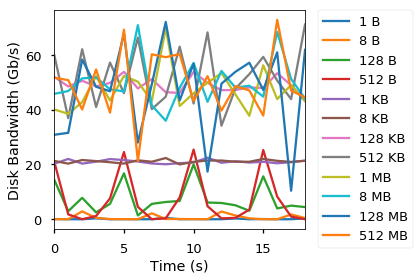

In [32]:
disk.plot(y=['1 B','8 B','128 B','512 B','1 KB','8 KB','128 KB','512 KB','1 MB','8 MB','128 MB','512 MB'])
plt.ylabel("Disk Bandwidth (Gb/s)")
plt.xlabel("Time (s)")
#plt.ylim(-50,200)
plt.xlim(0,18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.suptitle('Disk Bandwidth', fontsize=14, fontweight='bold')
plt.tight_layout() # otherwise it's cut
plt.savefig('/Users/massimilianogalli/Documents/openlab2018/LaTeX_template_openlab_approved/figures/disk_sto_time_w.eps',format='eps',dpi=1000)
plt.show()

In [35]:
means.plot(y=['Average Disk Bandwidth'],xticks=means.index,marker='d').set_xticklabels(means.Range)
#ax.set_xticklabels(means.action)
plt.ylabel("Average Disk Bandwidth (Gb/s)")
plt.xlabel("Buffer Size")
#plt.ylim(0,100)
plt.legend(bbox_to_anchor=(0.4, 0.2), loc=2, borderaxespad=0.)
#plt.suptitle('Average Disk Bandwidth (Buffer Size)', fontsize=14, fontweight='bold')
plt.xticks(rotation=40)
plt.tight_layout() # otherwise it's cut
plt.savefig('/Users/massimilianogalli/Documents/openlab2018/LaTeX_template_openlab_approved/figures/disk_sto_buf_w.eps',format='eps',dpi=1000)
plt.show()